In [2]:
  import numpy as np 
  import pandas as pd 
  import seaborn as sns
  import matplotlib.pyplot as plt   
  %matplotlib inline
  import warnings
  warnings.filterwarnings('ignore')

# EDA on the Student Dataset    

In [3]:
df=pd.read_csv('data/stud.csv')

In [ ]:

# Show the first 5 records
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
#Check Missing Values

df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
#Check for Duplicates
df.duplicated().sum()

0

In [19]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [21]:
# Select the Numerical Columns

cat_columns=df.select_dtypes('object')

# Select the Categorical Columns
num_columns=df.select_dtypes('int64')

In [24]:
#Check for the number of unique categories

for col in cat_columns.columns:
    print(f'Column {col} has {df[col].unique()} values')

Column gender has ['female' 'male'] values
Column race/ethnicity has ['group B' 'group C' 'group A' 'group D' 'group E'] values
Column parental level of education has ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] values
Column lunch has ['standard' 'free/reduced'] values
Column test preparation course has ['none' 'completed'] values


In [26]:
num_columns.head(5)

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [ ]:
# Feature Engineering
df['total score']=df['math score'] + df['reading score'] +df['writing score']
df['average']=df['total score']/3

In [39]:
# Some Insights

a=df[df['math score']==100]['average'].count()
b=df[df['reading score']==100]['average'].count()
c=df[df['writing score']==100]['average'].count()

print(f' Students who full marks in Math is {a}\n Reading is {b}\n Writing is {c}')

 Students who full marks in Math is 7
 Reading is 17
 Writing is 14


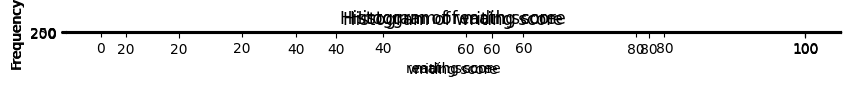

In [55]:
# Histogram for the numerical features

plt.figure(figsize=(10, 6))
for i, col in enumerate(num_columns, 1):
    plt.subplot(len(num_columns), 1, i)
    plt.hist(num_columns[col], bins=10, color='blue', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [71]:
def plot_histograms(df):
    import matplotlib.pyplot as plt
    import seaborn as sns

    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    print(numerical_columns)
    print(categorical_columns)

    # Plot numerical histograms
    plt.figure(figsize=(6, 10))
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(len(numerical_columns), 1, i)
        sns.histplot(df[col], kde=True, color='blue')
        plt.title(f'Histogram of {col}')

    plt.tight_layout()
    plt.show()

    # Plot categorical bar plots
    plt.figure(figsize=(6, 16))
    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(len(categorical_columns), 1, i)
        df[col].value_counts().plot(kind='bar', color='green', alpha=0.7)
        plt.title(f'Bar Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

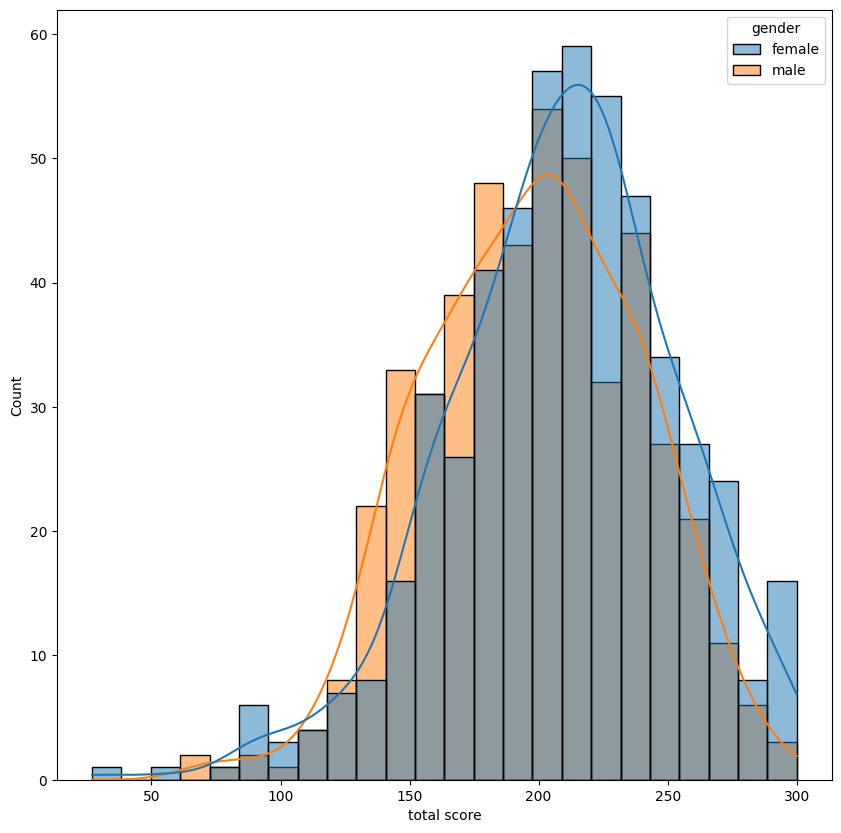

In [ ]:
# Total Scores by Gender

plt.figure(figsize=(10,10))
sns.histplot(data=df,x=df['total score'],hue=df['gender'],kde=True)
plt.show